<a href="https://colab.research.google.com/github/MuhsinaSidheeqa/Water_Quality_Classification/blob/main/project_WaterQuality_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Necessary Libraries**

In [ ]:
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.5
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report

Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 25.6 MB/s eta 0:00:00


In [ ]:
import warnings
warnings.filterwarnings('ignore')

**Read the Dataset**

In [ ]:
df=pd.read_csv('/content/waterQuality1.csv')
df

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,10,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


**Viewing the First Five Rows**

In [ ]:
df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


**Exploring Dataset Columns**

In [ ]:
df.columns

Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium', 'is_safe'],
      dtype='object')

**Data Cleaning and Preprocessing**

In [ ]:
df.isna().sum()

,0
aluminium,0
ammonia,0
arsenic,0
barium,0
cadmium,0
chloramine,0
chromium,0
copper,0
flouride,0
bacteria,0


**Checking Data Types of Each Column**

In [ ]:
df.dtypes

,0
aluminium,float64
ammonia,object
arsenic,float64
barium,float64
cadmium,float64
chloramine,float64
chromium,float64
copper,float64
flouride,float64
bacteria,float64


**Applying Label Encoder to convert Categorical value into numerical value**

In [ ]:
encoder=LabelEncoder()
df['ammonia']=encoder.fit_transform(df['ammonia'])

**Count the Unique values**

In [ ]:
df['is_safe'].value_counts()

,count
is_safe,
0,7084
1,912
#NUM!,3


In [ ]:
df.replace('#NUM!',np.nan,inplace=True)
df

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,2476,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,1222,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,526,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,307,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,1511,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,2362,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,1500,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,2285,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,194,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


**Dataset Overview**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   int64  
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [ ]:
df.isna().sum()

,0
aluminium,0
ammonia,0
arsenic,0
barium,0
cadmium,0
chloramine,0
chromium,0
copper,0
flouride,0
bacteria,0


**Fill the Missing Values**

In [ ]:
df['is_safe']=df['is_safe'].fillna(df['is_safe'].mode()[0])

In [ ]:
df.isna().sum()

,0
aluminium,0
ammonia,0
arsenic,0
barium,0
cadmium,0
chloramine,0
chromium,0
copper,0
flouride,0
bacteria,0


In [ ]:
df.dtypes

,0
aluminium,float64
ammonia,int64
arsenic,float64
barium,float64
cadmium,float64
chloramine,float64
chromium,float64
copper,float64
flouride,float64
bacteria,float64


In [ ]:
df['is_safe']=encoder.fit_transform(df['is_safe'])

In [ ]:
df['is_safe'].value_counts()

,count
is_safe,
0,7087
1,912


**VISUALIZATION**

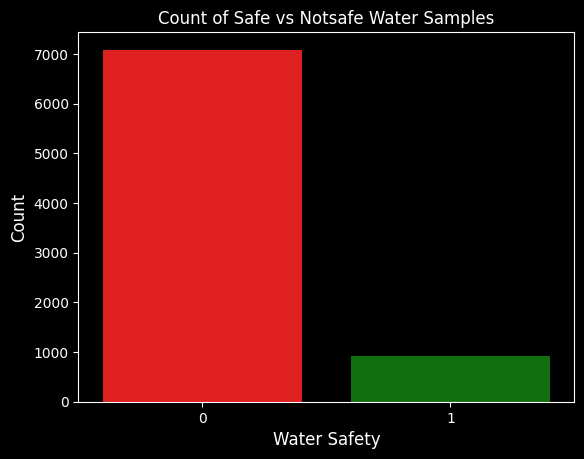

In [ ]:
plt.style.use("dark_background")
sns.countplot(x="is_safe", data=df,palette=["red", "green"])
plt.xlabel("Water Safety", fontsize=12, color="white")
plt.ylabel("Count", fontsize=12, color="white")
plt.title("Count of Safe vs Notsafe Water Samples")
plt.show()


The number of Notsafe water samples (0) is significantly higher than the safe water samples (1).


In [ ]:
fig=px.scatter(df, x="arsenic", y="lead", color="is_safe",title="Scatter Plot of Arsenic vs. Lead",template="plotly_dark")
fig.show()



*Majority of points are blue (unsafe), with yellow (safe) points scattered.
*Most data points are clustered near low arsenic levels.

In [ ]:
fig = px.pie(df,names='is_safe',hole=0.4,labels=['not safe','safe'],title="Proportion of Safe vs Notsafe Water Samples",color_discrete_map={"Not Safe": "red", "Safe": "green"},template="plotly_dark")
fig.show()


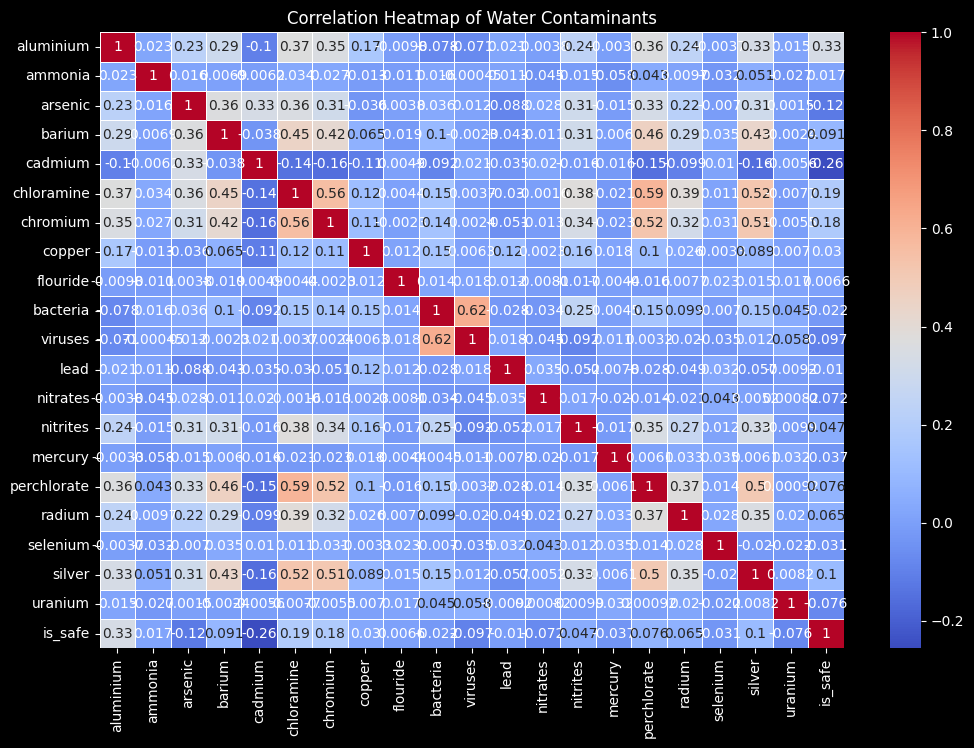

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True, linewidths=0.5)
plt.title("Correlation Heatmap of Water Contaminants")
plt.show()


1(red diagonal values):perfect positive correlation;
positive values(red shades):one contaminant increases , another tends to increase(direct relationship);
negative values(blue shades) indicates inverse relationship


**Define Features(X) and Target(y)**

In [ ]:
X=df.iloc[:,:-1]
X

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
0,1.65,2476,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,0.000,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02
1,2.32,1222,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,0.650,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05
2,1.01,526,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,0.003,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01
3,1.36,307,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,0.710,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05
4,0.92,1511,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,0.001,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,2362,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,0.000,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03
7995,0.05,1500,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,0.000,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08
7996,0.09,2285,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,0.000,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05
7997,0.01,194,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,0.000,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00


In [ ]:
y=df.iloc[:,-1]
y

,is_safe
0,1
1,1
2,0
3,1
4,1
...,...
7994,1
7995,1
7996,1
7997,1


**Scale the Features in the range of 0-1**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[0.32673267, 0.9660554 , 0.03809524, ..., 0.8       , 0.68      ,
        0.22222222],
       [0.45940594, 0.47678502, 0.00952381, ..., 0.8       , 0.54      ,
        0.55555556],
       [0.2       , 0.20522825, 0.03809524, ..., 0.7       , 0.88      ,
        0.11111111],
       ...,
       [0.01782178, 0.89153336, 0.        , ..., 0.        , 0.08      ,
        0.55555556],
       [0.0019802 , 0.07569255, 0.00952381, ..., 0.        , 0.        ,
        0.        ],
       [0.00792079, 0.89153336, 0.00952381, ..., 0.        , 0.08      ,
        0.55555556]])

**Split the Data into Training and Testing Sets**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1)

**Take the dimensions**

In [ ]:
X_train.shape,y_train.shape

((5599, 20), (5599,))

In [ ]:
X_test.shape,y_test.shape

((2400, 20), (2400,))

**Model Building**

In [ ]:
knn=KNeighborsClassifier(n_neighbors=9)
sv=SVC(kernel='poly')
nb=GaussianNB()
dt=DecisionTreeClassifier(criterion='entropy')
rf=RandomForestClassifier(random_state=1)
ab=AdaBoostClassifier(random_state=1)
gb=GradientBoostingClassifier(random_state=1)
xg=XGBClassifier(random_state=1)
models=[knn,sv,nb,dt,rf,ab,gb,xg]

In [ ]:
for model in models:
  print("******************",model,"******************")
  model.fit(X_train,y_train)
  y_pred1=model.predict(X_test)
  print(classification_report(y_test,y_pred1))

****************** KNeighborsClassifier(n_neighbors=9) ******************
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      2136
           1       0.72      0.31      0.43       264

    accuracy                           0.91      2400
   macro avg       0.82      0.65      0.69      2400
weighted avg       0.90      0.91      0.89      2400

****************** SVC(kernel='poly') ******************
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      2136
           1       0.78      0.53      0.63       264

    accuracy                           0.93      2400
   macro avg       0.86      0.76      0.80      2400
weighted avg       0.93      0.93      0.93      2400

****************** GaussianNB() ******************
              precision    recall  f1-score   support

           0       0.95      0.87      0.91      2136
           1       0.37      0.64      0.47       264



****************** KNeighborsClassifier(n_neighbors=9) ******************


<Figure size 800x600 with 0 Axes>

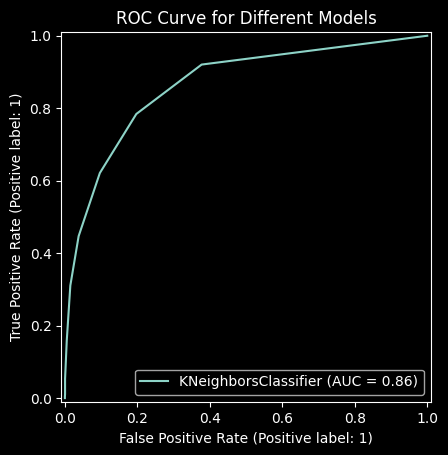

****************** SVC(kernel='poly') ******************


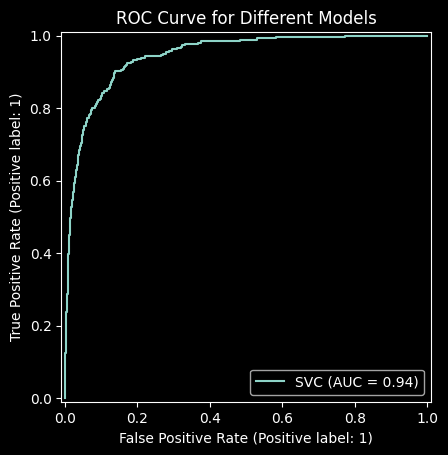

****************** GaussianNB() ******************


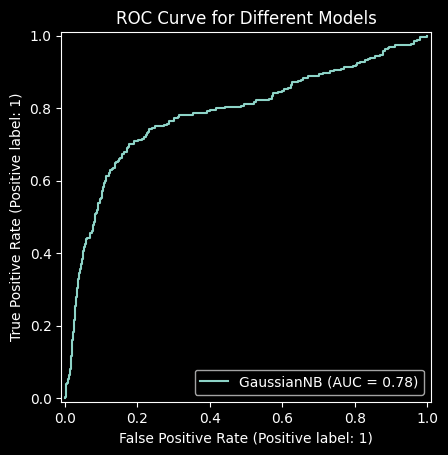

****************** DecisionTreeClassifier(criterion='entropy') ******************


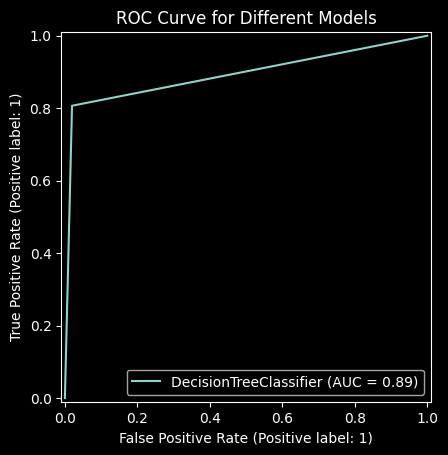

****************** RandomForestClassifier(random_state=1) ******************


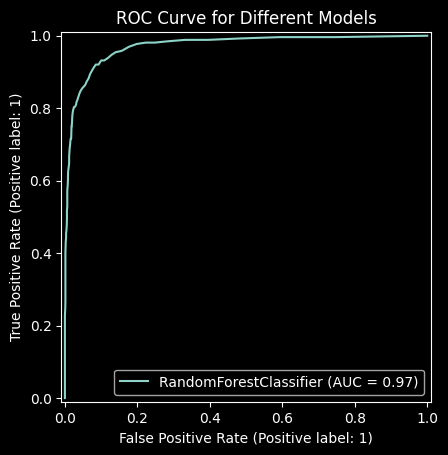

****************** AdaBoostClassifier(random_state=1) ******************


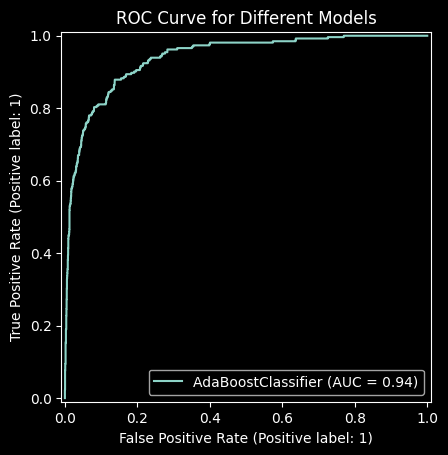

****************** GradientBoostingClassifier(random_state=1) ******************


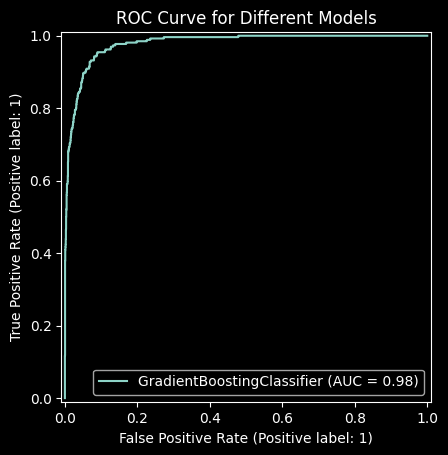

****************** XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...) ******************


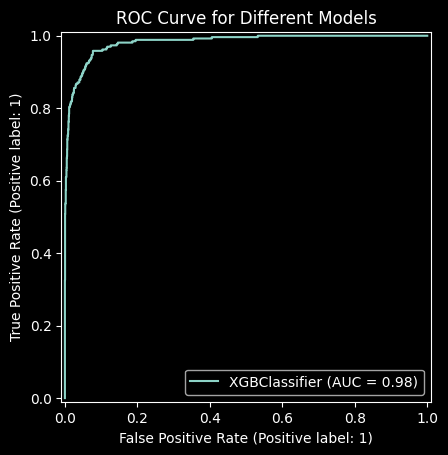

In [ ]:
plt.figure(figsize=(8, 6))
for model in models:
  print("******************",model,"******************")
  RocCurveDisplay.from_estimator(model, X_test, y_test)
  plt.title("ROC Curve for Different Models")
  plt.show()


A higher AUC(Area Under Curve) value indicates better model performance.
AUC=1:perfect classifier
AUC=0.5: random guessing
AUC<0.5: flipped prediction



**Apply Oversampling to reduce the imbalance**

In [ ]:
y.value_counts()

,count
is_safe,
0,7087
1,912


In [ ]:
from imblearn.over_sampling import SMOTE
os=SMOTE(random_state=1)
X_os,y_os=os.fit_resample(X,y)
y_os.value_counts()

,count
is_safe,
1,7087
0,7087


**Scaling and train_test_model on Balanced Data**

In [ ]:
scaler1=MinMaxScaler()
X_os_scaled=scaler1.fit_transform(X_os)
X_train_os,X_test_os,y_train_os,y_test_os=train_test_split(X_os,y_os,test_size=0.3,random_state=1)
X_train_os.shape,y_train_os.shape

((9921, 20), (9921,))

In [ ]:
knn_os=KNeighborsClassifier(n_neighbors=9)
sv_os=SVC(kernel='poly')
nb_os=GaussianNB()
dt_os=DecisionTreeClassifier(criterion='entropy')
rf_os=RandomForestClassifier(random_state=1)
ab_os=AdaBoostClassifier(random_state=1)
gb_os=GradientBoostingClassifier(random_state=1)
xg_os=XGBClassifier(random_state=1)
models_os=[knn_os,sv_os,nb_os,dt_os,rf_os,ab_os,gb_os,xg_os]

In [ ]:
for model_os in models_os:
  print("******************",model_os,"******************")
  model_os.fit(X_train_os,y_train_os)
  y_pred2=model_os.predict(X_test_os)
  print(classification_report(y_test_os,y_pred2,zero_division=0))

****************** KNeighborsClassifier(n_neighbors=9) ******************
              precision    recall  f1-score   support

           0       0.92      0.68      0.78      2088
           1       0.75      0.95      0.84      2165

    accuracy                           0.81      4253
   macro avg       0.84      0.81      0.81      4253
weighted avg       0.84      0.81      0.81      4253

****************** SVC(kernel='poly') ******************
              precision    recall  f1-score   support

           0       0.51      0.91      0.65      2088
           1       0.64      0.16      0.26      2165

    accuracy                           0.53      4253
   macro avg       0.58      0.53      0.45      4253
weighted avg       0.58      0.53      0.45      4253

****************** GaussianNB() ******************
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      2088
           1       0.80      0.82      0.81      2165



****************** KNeighborsClassifier(n_neighbors=9) ******************


<Figure size 800x600 with 0 Axes>

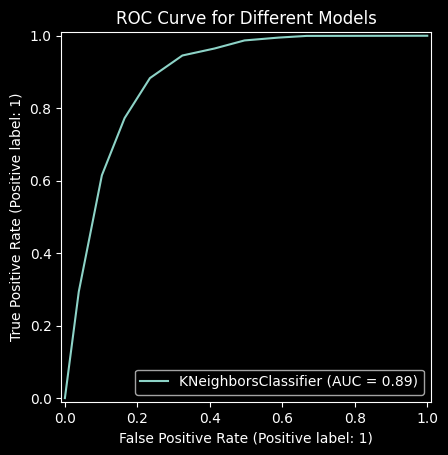

****************** SVC(kernel='poly') ******************


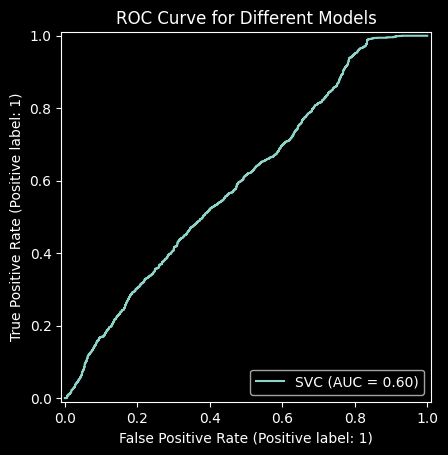

****************** GaussianNB() ******************


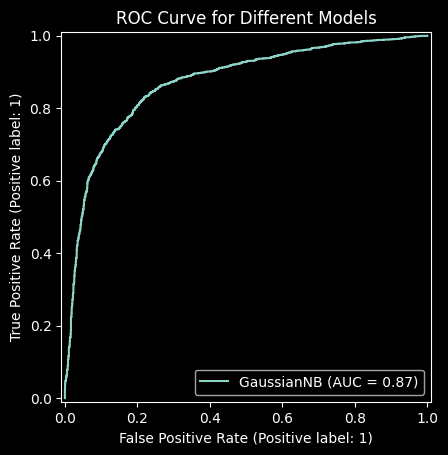

****************** DecisionTreeClassifier(criterion='entropy') ******************


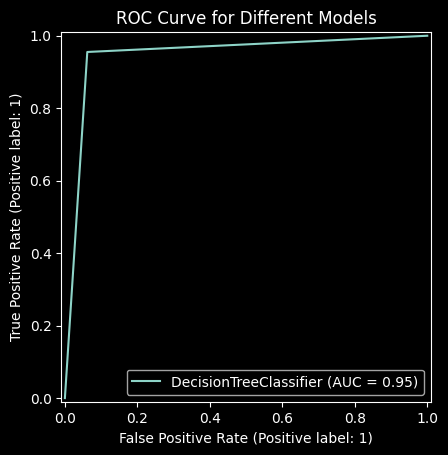

****************** RandomForestClassifier(random_state=1) ******************


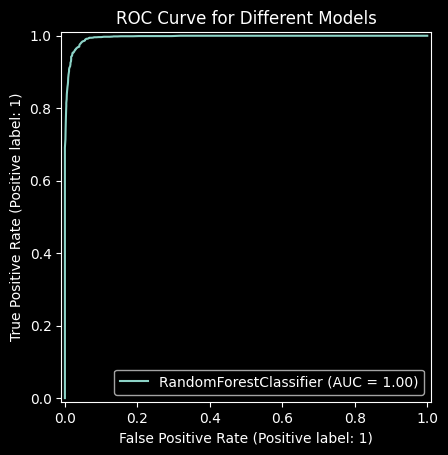

****************** AdaBoostClassifier(random_state=1) ******************


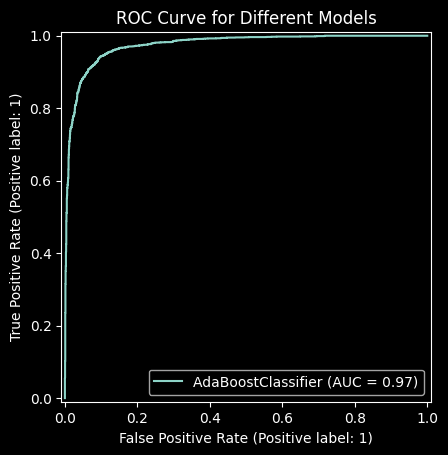

****************** GradientBoostingClassifier(random_state=1) ******************


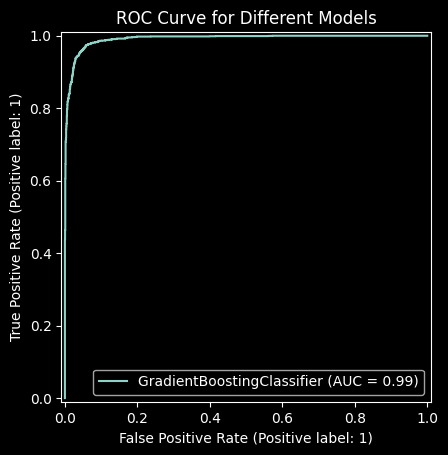

****************** XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...) ******************


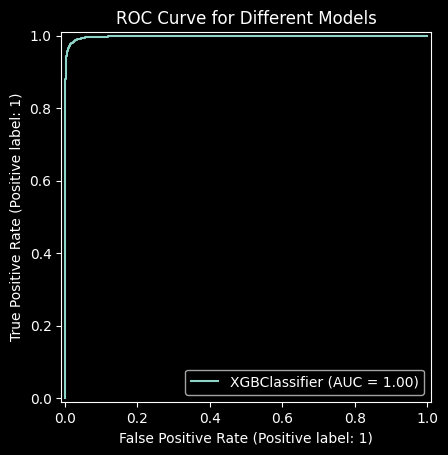

In [ ]:
plt.figure(figsize=(8, 6))
for model_os in models_os:
  print("******************",model_os,"******************")
  RocCurveDisplay.from_estimator(model_os, X_test_os, y_test_os)
  plt.title("ROC Curve for Different Models")
  plt.show()


**Feature Selection**

In [ ]:
X_os.columns

Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium'],
      dtype='object')

In [ ]:
features=['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine','chromium', 'copper',
          'flouride', 'bacteria', 'viruses', 'lead','nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium','silver', 'uranium']
ch_values,p_values=chi2(X_os_scaled,y_os)
chi2_results=pd.DataFrame({'Feature':features,'chi2 Score':ch_values,'p-values':p_values})
print(chi2_results)

        Feature   chi2 Score       p-values
0     aluminium  1068.950084  1.851376e-234
1       ammonia     1.761646   1.844194e-01
2       arsenic   260.597135   1.271615e-58
3        barium    58.965864   1.604312e-14
4       cadmium   731.741733  3.745167e-161
5    chloramine   342.758716   1.599847e-76
6      chromium   318.469029   3.121636e-71
7        copper    11.127648   8.505036e-04
8      flouride     0.052799   8.182619e-01
9      bacteria     6.269274   1.228495e-02
10      viruses   163.636302   1.816411e-37
11         lead     0.504147   4.776835e-01
12     nitrates    28.727467   8.331368e-08
13     nitrites     7.166363   7.428321e-03
14      mercury     7.041475   7.964343e-03
15  perchlorate    48.006022   4.249121e-12
16       radium    33.168980   8.448765e-09
17     selenium     5.933217   1.485809e-02
18       silver   100.734700   1.051669e-23
19      uranium    38.427614   5.682266e-10


**Checking p-value>0.05**

In [ ]:
high_p_values = chi2_results[chi2_results['p-values'] > 0.05]
print(high_p_values)



     Feature  chi2 Score  p-values
1    ammonia    1.761646  0.184419
8   flouride    0.052799  0.818262
11      lead    0.504147  0.477684


**Dropping columns with p-value>0.05**

In [ ]:
X_os.drop(['ammonia','flouride','lead'],axis=1,inplace=True)

In [ ]:
scaler2=MinMaxScaler()
X_new_scaled=scaler2.fit_transform(X_os)

In [ ]:
X_new_train,X_new_test,y_new_train,y_new_test=train_test_split(X_new_scaled,y_os,test_size=0.3,random_state=1)
X_new_train.shape,y_new_train.shape

((9921, 17), (9921,))

In [ ]:
knn_fs=KNeighborsClassifier(n_neighbors=9)
sv_fs=SVC(kernel='poly')
nb_fs=GaussianNB()
dt_fs=DecisionTreeClassifier(criterion='entropy')
rf_fs=RandomForestClassifier(random_state=1)
ab_fs=AdaBoostClassifier(random_state=1)
gb_fs=GradientBoostingClassifier(random_state=1)
xg_fs=XGBClassifier(random_state=1)
models_fs=[knn_fs,sv_fs,nb_fs,dt_fs,rf_fs,ab_fs,gb_fs,xg_fs]

In [ ]:
acc=[]
for model_fs in models_fs:
  model_fs.fit(X_new_train,y_new_train)
  y_pred3=model_fs.predict(X_new_test)
  print("******************",model_fs,"******************")
  print(classification_report(y_new_test,y_pred3,zero_division=0))
  acc.append(accuracy_score(y_new_test,y_pred3))

****************** KNeighborsClassifier(n_neighbors=9) ******************
              precision    recall  f1-score   support

           0       0.99      0.74      0.85      2088
           1       0.80      0.99      0.88      2165

    accuracy                           0.87      4253
   macro avg       0.89      0.87      0.86      4253
weighted avg       0.89      0.87      0.87      4253

****************** SVC(kernel='poly') ******************
              precision    recall  f1-score   support

           0       0.96      0.90      0.93      2088
           1       0.91      0.97      0.94      2165

    accuracy                           0.93      4253
   macro avg       0.94      0.93      0.93      4253
weighted avg       0.94      0.93      0.93      4253

****************** GaussianNB() ******************
              precision    recall  f1-score   support

           0       0.81      0.80      0.80      2088
           1       0.81      0.82      0.81      2165



****************** KNeighborsClassifier(n_neighbors=9) ******************


<Figure size 800x600 with 0 Axes>

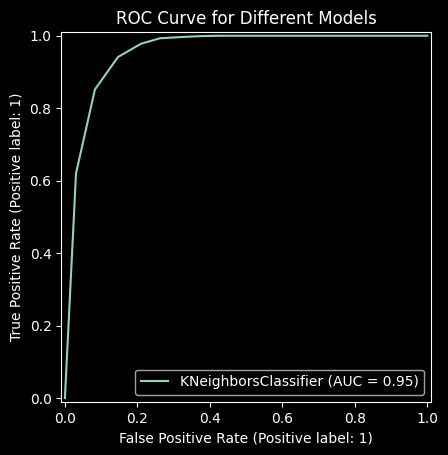

****************** SVC(kernel='poly') ******************


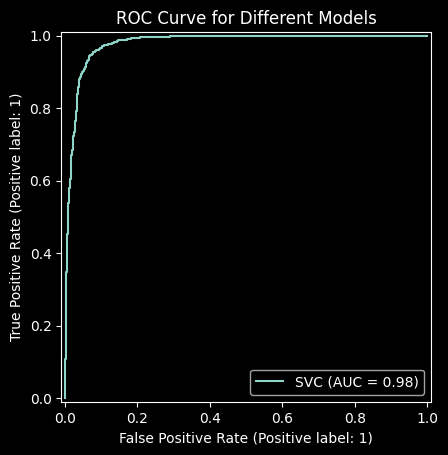

****************** GaussianNB() ******************


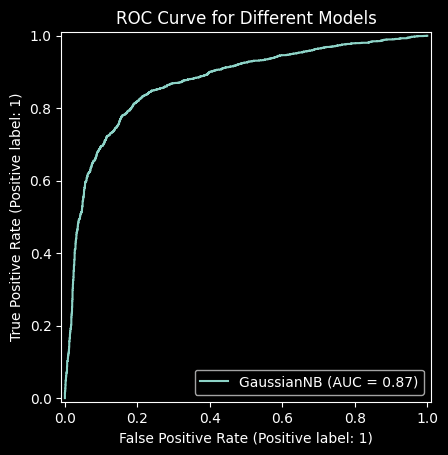

****************** DecisionTreeClassifier(criterion='entropy') ******************


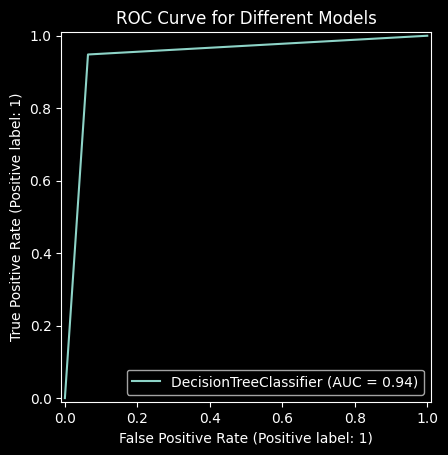

****************** RandomForestClassifier(random_state=1) ******************


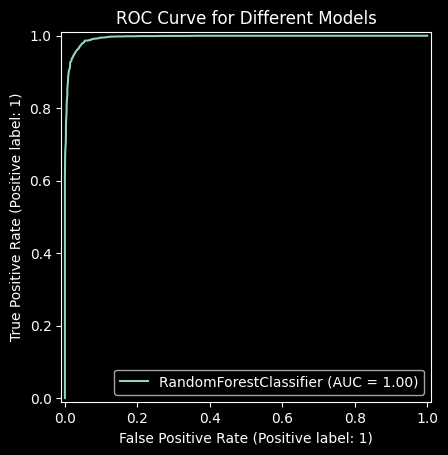

****************** AdaBoostClassifier(random_state=1) ******************


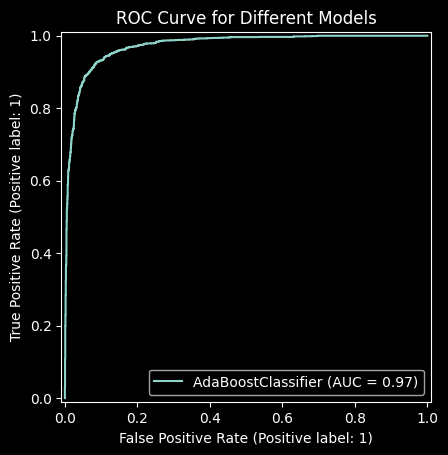

****************** GradientBoostingClassifier(random_state=1) ******************


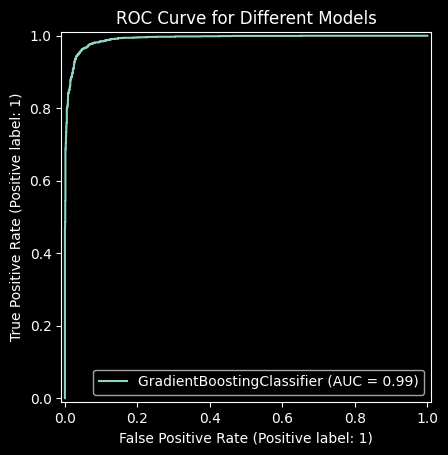

****************** XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...) ******************


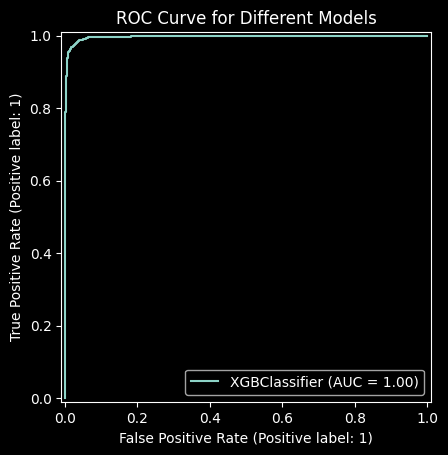

In [ ]:
plt.figure(figsize=(8, 6))
for model_fs in models_fs:
  print("******************",model_fs,"******************")
  RocCurveDisplay.from_estimator(model_fs, X_new_test, y_new_test)
  plt.title("ROC Curve for Different Models")
  plt.show()


Performance Comparison

In [ ]:
model_names=['knn','sv','nb','dt','ab','gb','rf','xg']
df = pd.DataFrame({'Model': model_names, 'Accuracy':acc})
fig = px.bar(df, x='Model', y='Accuracy',color_discrete_sequence=['light blue'],template="plotly_dark",
             title="Performance Comparison")
fig.show()


*XGBoost has maximum accuracy

In [ ]:
cases=['Imbalanced','Balanced','Feature Selection']
test=[y_test,y_test_os,y_new_test,y_new_test]
preds=[y_pred1,y_pred2,y_pred3]
scores=[]
for i in range(3):
  scores.append(accuracy_score(test[i],preds[i]))
df=pd.DataFrame({'cases': cases, 'Accuracy': scores})
fig=px.bar(df, x='cases', y='Accuracy',color='cases',color_discrete_sequence=['white','pink','skyblue'],
             template="plotly_dark", title="XGB Performance at Different Stages")
fig.show()


Here XGBoost has maximum accuracy in Balanced stage


**Saving the model**

In [ ]:
import pickle
pickle.dump(xg_os,open('WaterQuality_xg_os.sav','wb'))
pickle.dump(scaler1,open('WQ_scaler.sav','wb'))